In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv("medical_examination.csv")

In [3]:
# Add 'overweight' column
df['overweight'] = np.where((df["weight"]/(df["height"]/100)**2>25).astype(int), 1, 0)

In [4]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df["cholesterol"] = np.where(df["cholesterol"]>1, 1, 0)
df["gluc"] = np.where(df["gluc"]>1, 1, 0)

In [5]:
# Draw Categorical Plot
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars="cardio", value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"], var_name="variable")

In [6]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
df_cat = df_cat.groupby(["cardio", "variable", "value"]).size().reset_index(name="total")

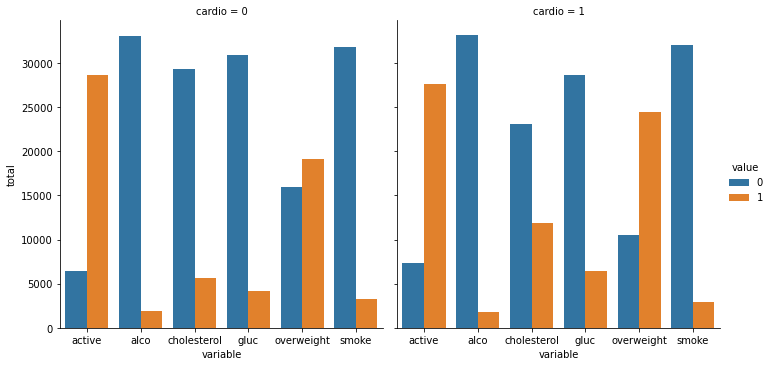

In [7]:
# Draw the catplot with 'sns.catplot()'
g = sns.catplot(data=df_cat, x="variable", y="total", hue="value", col="cardio", kind="bar")

In [8]:
# Draw Heat Map
# Clean the data
df_heat = df[(df["ap_lo"] <= df["ap_hi"]) &
(df["height"] >= df["height"].quantile(0.025)) &
(df["height"] <= df["height"].quantile(0.975)) &
(df["weight"] >= df["weight"].quantile(0.025)) &
(df["weight"] <= df["weight"].quantile(0.975))]

In [9]:
# Calculate the correlation matrix
corr = df_heat.corr()

<AxesSubplot:>

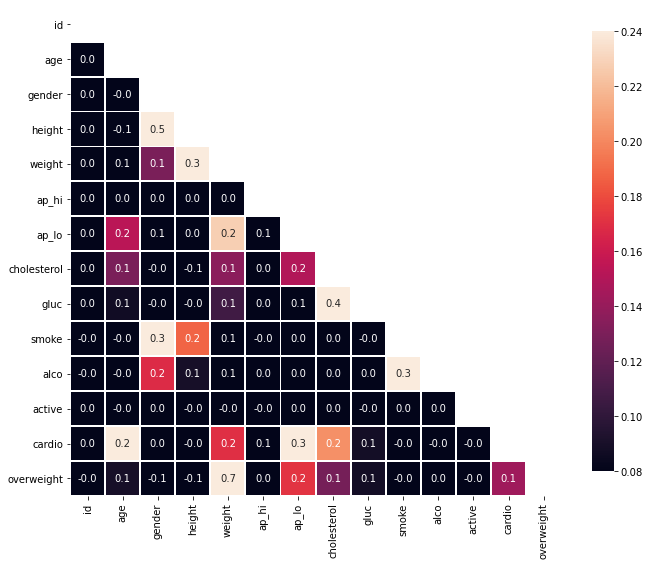

In [10]:
# Generate a mask for the upper triangle
mask = np.triu(corr)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11,9))
# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, annot=True, mask=mask, fmt=".1f", vmin=.08, vmax=.24, cbar_kws={"shrink": .9}, linewidths=.9)